In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns
import tensorflow as tf
import cv2, os, gc, glob
from tqdm import tqdm
from keras.preprocessing import image
from tensorflow.keras import layers, models
import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [2]:
os.listdir('C:\\Users\\Akshata\\Desktop\\project\\NitrogenDeficiencyImage\\Training')

['swap1', 'swap2', 'swap3', 'swap4']

In [3]:
image_directory= 'C:\\Users\\Akshata\\Desktop\\project\\NitrogenDeficiencyImage\\Training\\'
swap1=os.listdir(image_directory+'swap1/')
swap2=os.listdir(image_directory+'swap2/')
swap3=os.listdir(image_directory+'swap3/')
swap4=os.listdir(image_directory+'swap4/')

In [4]:
print(len(swap1))
print(len(swap2))
print(len(swap3))
print(len(swap4))

1407
1203
1400
1399


In [5]:
print(swap1)

['SWAP_TR1_001.jpg', 'SWAP_TR1_002.jpg', 'SWAP_TR1_003.jpg', 'SWAP_TR1_004.jpg', 'SWAP_TR1_005.jpg', 'SWAP_TR1_006.jpg', 'SWAP_TR1_007.jpg', 'SWAP_TR1_008.jpg', 'SWAP_TR1_009.jpg', 'SWAP_TR1_010.jpg', 'SWAP_TR1_011.jpg', 'SWAP_TR1_012.jpg', 'SWAP_TR1_013.jpg', 'SWAP_TR1_014.jpg', 'SWAP_TR1_015.jpg', 'SWAP_TR1_016.jpg', 'SWAP_TR1_017.jpg', 'SWAP_TR1_018.jpg', 'SWAP_TR1_019.jpg', 'SWAP_TR1_020.jpg', 'SWAP_TR1_021.jpg', 'SWAP_TR1_022.jpg', 'SWAP_TR1_023.jpg', 'SWAP_TR1_024.jpg', 'SWAP_TR1_025.jpg', 'SWAP_TR1_026.jpg', 'SWAP_TR1_027.jpg', 'SWAP_TR1_028.jpg', 'SWAP_TR1_029.jpg', 'SWAP_TR1_030.jpg', 'SWAP_TR1_031.jpg', 'SWAP_TR1_032.jpg', 'SWAP_TR1_033.jpg', 'SWAP_TR1_034.jpg', 'SWAP_TR1_035.jpg', 'SWAP_TR1_036.jpg', 'SWAP_TR1_037.jpg', 'SWAP_TR1_038.jpg', 'SWAP_TR1_039.jpg', 'SWAP_TR1_040.jpg', 'SWAP_TR1_041.jpg', 'SWAP_TR1_042.jpg', 'SWAP_TR1_043.jpg', 'SWAP_TR1_044.jpg', 'SWAP_TR1_045.jpg', 'SWAP_TR1_046.jpg', 'SWAP_TR1_047.jpg', 'SWAP_TR1_048.jpg', 'SWAP_TR1_049.jpg', 'SWAP_TR1_050.jpg',

In [6]:
image_directory= 'C:\\Users\\Akshata\\Desktop\\project\\NitrogenDeficiencyImage\\Training\\swap1\\*.jpg'
glob.glob(image_directory)
images=[cv2.cvtColor(cv2.imread(image_directory),cv2.COLOR_BGR2RGB) for image_directory in glob.glob(image_directory)]

In [7]:
type(images)
len(images)

1407

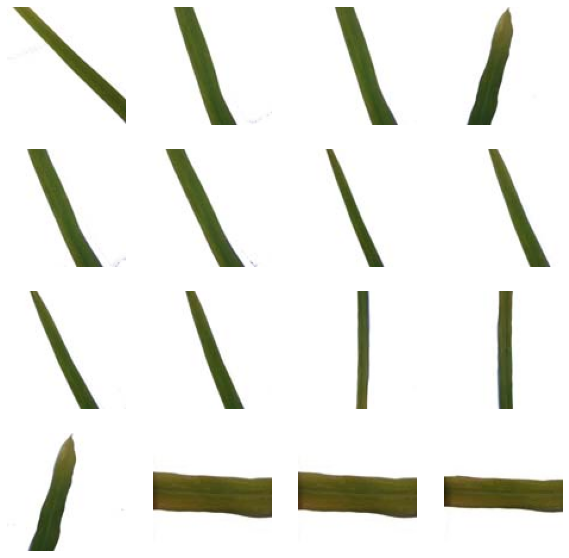

In [8]:
fig=plt.figure(figsize=(10,10))
rows,cols=4,4
for j in range(0,cols*rows):
    fig.add_subplot(rows,cols,j+1)
    plt.imshow(images[j])
    plt.axis('off')
plt.show()

In [9]:
imagePaths = []
for dirname, _, filenames in os.walk('C:\\Users\\Akshata\\Desktop\\project\\NitrogenDeficiencyImage\\Training'):
    for filename in filenames:
        if (filename[-3:] == 'jpg'):
            imagePaths.append(os.path.join(dirname, filename))

In [10]:
Data = []
Target = []
resize = 255

cat = {'swap1': 'swap1',
       'swap2': 'swap2',
       'swap3': 'swap3',
       'swap4': 'swap4'}

for imagePath in tqdm(imagePaths):
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (resize, resize)) /255

    Data.append(image)
    Target.append(cat[label])

100%|█████████████████████████████████████████████████████████████████████████████| 5409/5409 [00:13<00:00, 412.87it/s]


C:\Users\Akshata\.conda\envs\poject\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


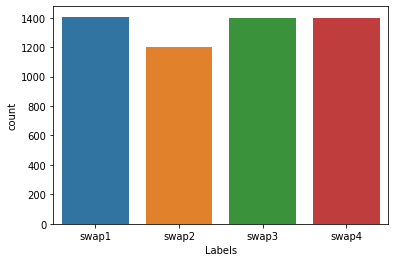

In [11]:
df=pd.DataFrame(Target,columns=['Labels'])
sns.countplot(df['Labels'])
plt.show()

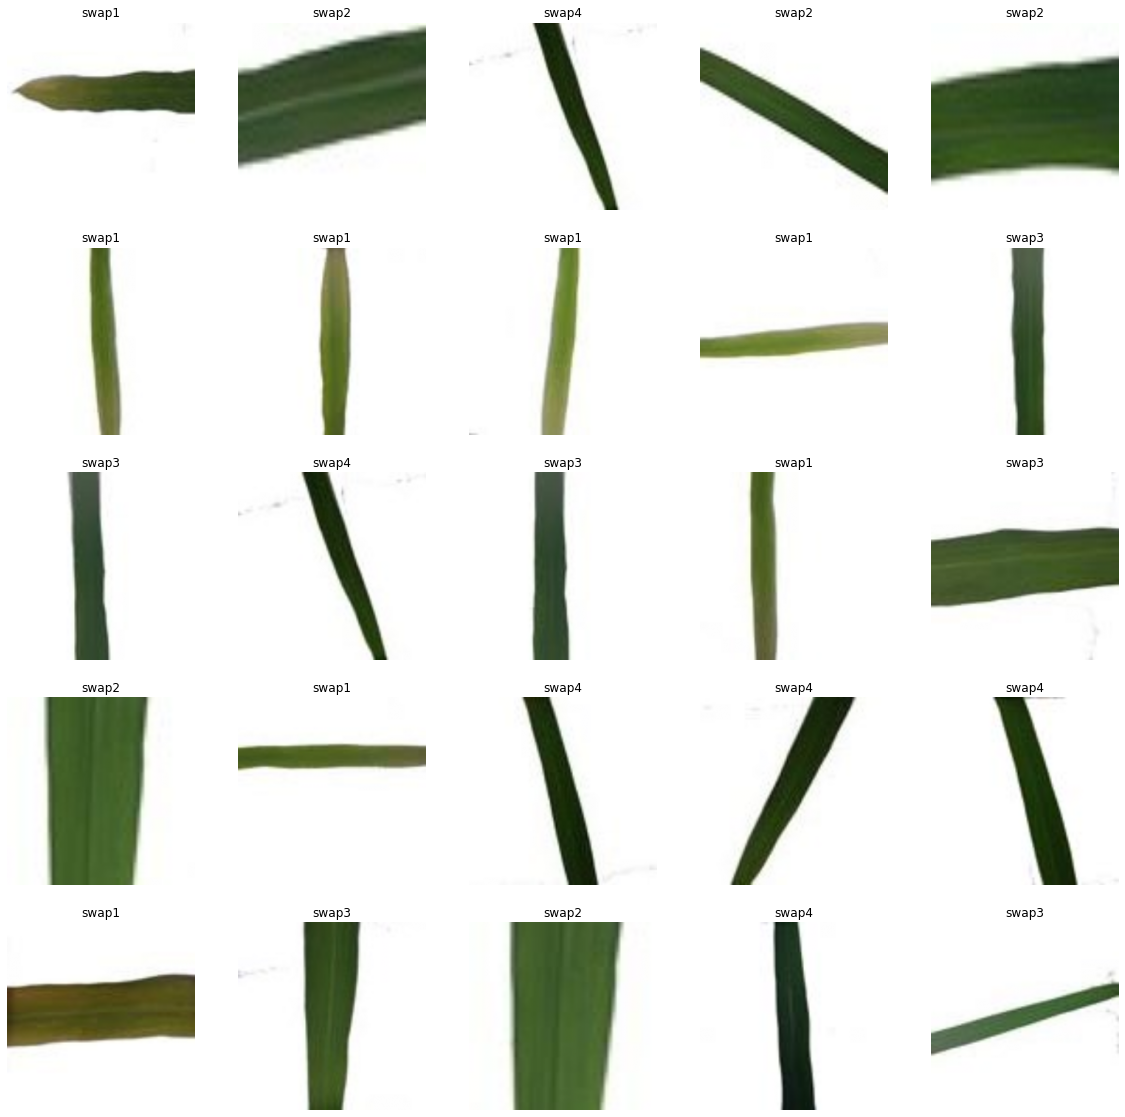

In [12]:
plt.figure(figsize=(20,20))
for n, i in enumerate(list(np.random.randint(0,len(imagePaths),25))):
    plt.subplot(5,5,n+1)
    plt.imshow(Data[i], cmap='gray')
    plt.title(Target[i])
    plt.axis('off')
plt.show()

In [13]:
le = LabelEncoder()
labels = le.fit_transform(Target)
labels = to_categorical(labels)

print(le.classes_)
print(labels)

['swap1' 'swap2' 'swap3' 'swap4']
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [14]:
(x_train, x_test, y_train, y_test) = train_test_split(Data, labels,test_size=0.40,stratify=labels,random_state=42)
                 

                                     

trainX = np.array(x_train)
testX = np.array(x_test)
trainY = np.array(y_train)
testY = np.array(y_test)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

s = 255 # size

(3245, 255, 255, 3)
(2164, 255, 255, 3)
(3245, 4)
(2164, 4)


In [15]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size =(3,3), activation = "relu", input_shape=(s,s,3), kernel_initializer='he_normal',))
# model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size =(3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size =(3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2), strides = (1,1)))

model.add(Dropout(0.25))

#fully connected
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation = "softmax"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [16]:
model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.categorical_crossentropy,
             metrics=['accuracy'])

print(model.summary())

history=model.fit(trainX, trainY, epochs=15, batch_size=40, verbose=1)





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 253, 253, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 59, 59, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 59, 59, 128)      

In [17]:
modelLoss, modelAccuracy=model.evaluate(testX, testY)
print('Test Loss is{}'.format(modelLoss))
print('Test Accuracy is{}'.format(modelAccuracy))


2164/2164 [==============================] - 42s 20ms/step
Test Loss is0.12219072631500014
Test Accuracy is0.9718114733695984


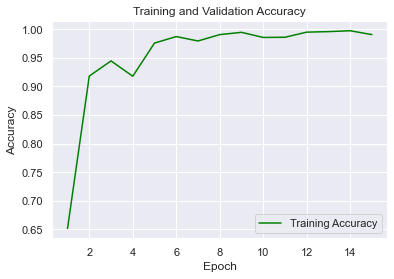

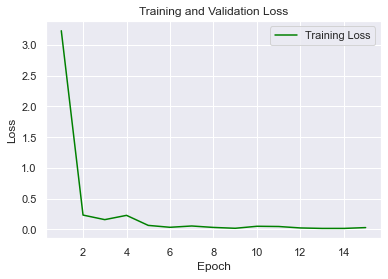

In [18]:
sns.set()

acc=history.history['accuracy']
loss=history.history['loss']
epochs=range(1, len(loss) + 1)

plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()

plt.plot(epochs, loss, color='green', label='Training Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [19]:
model.save("nitrogen_deficiency_image_model.h5")

In [20]:
# classification report on train
batch_size=40

predIdxs = model.predict (trainX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(trainY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

              precision    recall  f1-score   support

       swap1    1.00000   1.00000   1.00000       844
       swap2    1.00000   1.00000   1.00000       722
       swap3    1.00000   0.98095   0.99038       840
       swap4    0.98129   1.00000   0.99055       839

    accuracy                        0.99507      3245
   macro avg    0.99532   0.99524   0.99523      3245
weighted avg    0.99516   0.99507   0.99507      3245



swap3


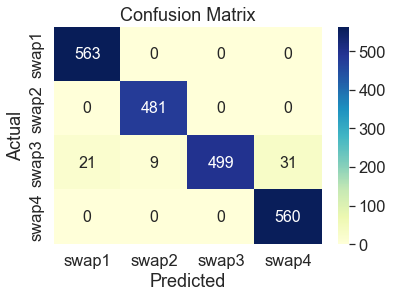

In [21]:
class_names = ['swap1', 'swap2', 'swap3', 'swap4']

y_pred = model.predict(testX)
print(class_names[np.argmax(y_pred[1])])

# Plotting Confusion Matrix
x = confusion_matrix(testY.argmax(axis=1),y_pred.argmax(axis=1))
Confusion_Matrix = pd.DataFrame(x, index=class_names, columns=class_names)

sns.set(font_scale=1.5, color_codes=True, palette='deep')
sns.heatmap(Confusion_Matrix, annot=True, annot_kws={'size':16}, fmt='d', cmap='YlGnBu')

plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title('Confusion Matrix')
plt.show()